<a href="https://colab.research.google.com/github/anapessoapcrj/NOTEBOOK/blob/main/MVP_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<p align="center">MVP:  Machine Learning para Problema de Classificação**

<p align="justify">Ana Paula Pessoa da Silva
<p align="justify">Puc Rio de Janeiro
<p align="justify">Abril de 2024

# **Introdução**

**Apresentação e Definição do Problema**

<p align="justify">O presente projeto apresentará as etapas do processo para aprendizagem supervisionada de máquina visando a predição de rótulos, o problema de classificação, a partir de um conjunto de atributos. O trabalho faz parte primeiro Sprint do curso de pós-graduação Machine Learning & Analytics apresentado pelo Curso da Puc Rio de Janeiro no ano de 2024.

<p align="justify">O dataset utilizado neste projeto é o Estimation of Obesity Levels Based On Eating Habits and Physical Condition, hospedado no IC Irvine Machine Learning Repository.  A base é provenientes 77% de dados gerados sinteticamente e 23% de respostas obtidas de uma plataforma web nos países do México, Colômbia e Peru. Os dados sintéticos foram criados para balancear as categorias relacionadas a classificação do nível do peso que, a princípio, estava concentrada na categoria peso normal. O dataset apresenta diversos atributos relacionados a hábitos alimentares e condições de esforço físico que pretende servir como base para estimar o nível de obesidade. Também apresentam outras variáveis que estão relacionadas a condição ou estado físico do individuo como a idade, gênero, peso e altura. Os dois últimos estão fortemente correlacionados com os rótulos do dataset, pois compõem o cálculo do Indice de Massa Corporal, o IMC, (a formula é o Peso, em Quilo, dividido pelo Quadrado da Altura em Metros).  O objetivo deste MVP é verificar se as variáveis deste dataset, principalmente as que estão relacionadas a hábitos alimentares e esforço físico servem como bons preditores para a classificação do nível de peso.
Em caso de necessidade mais informações sobre o dataset, consulte:

[Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)


[Artigo sobre o dataset](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub#fd1)

**Informações sobre os atributos - Nomes das colunas**

1.   Gênero como 'Gender'
2.   Idade como 'Age'
3.   Altura como 'Height'
4.   Histórico familiar com sobrepeso como 'family_history_with_overweight'
5.   Consume comida altamente calórica com frequência como 'FAVC'
6.   Frequencia em que consome vegetais nas refeições como 'FCVC'
7.   Quantas refeições por dia como 'NCP'
8.   Come algo entre as refeições como 'CAEC'
9.   FUMA como 'SMOKE'
10.   Consumo de água diária (litro) como 'CH02'
11.   Monitora as calorias consumidas diariamente como 'SCC'
12.   Quantas vezes pratica atividade física como 'FAF'
13.   Quanto tempo fica em computador, celular, tv como 'TUE'
14.   Qual a frequência que faz consumo de alcool como 'CALC'
15.   Meio de transporte como 'MTRANS'
16.   Nível de obesidade como 'NObeyesdad'

**Informações sobre as classes do NObeyesdad**

1.   Insufficient_Weight
2.   Normal_Weight
3.   Overweight_Level_I
4.   Overweight_Level_II
5.   Obesity_Type_I
6.   Obesity_Type_II
7.   Obesity_Type_III

Em comparação ao IMC, a classificação do dataset tem uma classe a mais que seria o Sobrepeso nível II.



A seguir será importado os pacotes ou bibliotecas necessários para o projeto.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

<p align="justify">Não houve a necessidade de importar pacote para exclusão de valores missing, pois o dataset não apresenta este problema.

#**Carga e reconhecimento dos Dados**

<p align = "justify">Será instalado o pacote relacionado ao repositório da UC Irvine Machine Learning Repository. Em seguida será importado o dataset e, por fim, serão instanciados o X e o Y.  O X se refere aos atributos do dataset, as variáveis independentes.  O Y corresponde ao rótulo que, por sua vez, depende dos atributos em X.  Por esta razão Y é uma variavel dependente.  Além de rótulo, o Y também pode ser chamada de Alvo (Target) já que o objetivo é predizer classes.  

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
level_obesity = fetch_ucirepo(id=544)
Independente_X = level_obesity.data.features
Categoria_y = level_obesity.data.targets

Vendo as primeiros cinco e as últimas cinco linhas.

In [ ]:
Independente_X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [ ]:
Independente_X.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation


Vamos ver a dimensão e o tipo de dados dos atributos (X)

In [ ]:
print(Independente_X.shape)

(2111, 16)


In [ ]:
Independente_X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

#**Pré-Processamento**

<p align="justify">O dataset tem diversas colunas do tipo object.  Para a execução de diversas tarefas, relacionadas a feature selection e machine learning, é necessária a conversão de tipo de dado para numérica.  Não serão utilizando as ferramentas OneHotEncond ou LabelEncond para isto.  Ao invés disso serão criados funções para realizar as substituições de valores.  A razão por esta decisão se deve a dois motivos: ser um dataset pequeno com poucas classes categóricas, e muitas que se repetem em várias colunas (ex:  valores que expressam frequência ou valores binários como 'sim' ou 'não') e a outra causa é que esta forma de conversão permite o controle da transformação do tipo de dados, sendo possível garantir que a frequência "nunca" ou "não" tenham valor de 0 (zero), por exemplo.

<p align="justify">Antes da transformação, vamos ver quais classes categóricas existem em cadas as variáveis que estão no dataset.

In [ ]:
Independente_X.Gender.value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [ ]:
Independente_X.family_history_with_overweight.value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [ ]:
Independente_X.FAVC.value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

In [ ]:
Independente_X.CAEC.value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [ ]:
Independente_X.SMOKE.value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [ ]:
Independente_X.SCC.value_counts()

SCC
no     2015
yes      96
Name: count, dtype: int64

In [ ]:
Independente_X.CALC.value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [ ]:
Independente_X.MTRANS.value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

<p align = "justify">No caso da transformação dos valores da variável meio de transporte, 'MTRANS', a transformação será feita considerando o esforço físico empregado para o deslocamento.  Assim sendo, ocorrerá uma redução de 5 classes para 2 duas.

A seguir, serão criado as funções.

In [ ]:
def genero(valor):
    if valor == 'Male':
      return 1.0
    else:
      return 0.0

def yes_no(valor):
    if valor == 'no':
      return 0.0
    else:
      return 1.0

def frequencia(valor):
    if valor == 'no':
      return 0.0
    if valor == 'Sometimes':
      return 1.0
    if valor == 'Frequently':
      return 2.0
    if valor == 'Always':
      return 3.0

def fisico(valor):
    if valor == 'Public_Transportation' or valor == 'Automobile' or valor == 'Motorbike':
      return 0.0
    else:
      return 1.0

Agora que foram criadas as funções, vamos aplicá-las nas variáveis.

In [ ]:
Independente_X['Gender'] = Independente_X['Gender'].apply(genero)
Independente_X['family_history_with_overweight'] = Independente_X['family_history_with_overweight'].apply(yes_no)
Independente_X['FAVC'] = Independente_X['FAVC'].apply(yes_no)
Independente_X['SMOKE'] = Independente_X['SMOKE'].apply(yes_no)
Independente_X['SCC'] = Independente_X['SCC'].apply(yes_no)
Independente_X['CAEC'] = Independente_X['CAEC'].apply(frequencia)
Independente_X['CALC'] = Independente_X['CALC'].apply(frequencia)
Independente_X['MTRANS'] = Independente_X['MTRANS'].apply(fisico)

Agora só falta converter os valores da variavel target e gerar um dataset único.

In [ ]:
Categoria_y['NObeyesdad'] = Categoria_y['NObeyesdad'].map({'Insufficient_Weight': 1, 'Normal_Weight': 2, 'Overweight_Level_I': 3,
                                                           'Overweight_Level_II': 4,'Obesity_Type_I': 5, 'Obesity_Type_II':
                                                           6, 'Obesity_Type_III': 7})

Considerando a ordinalidade, o peso insuficiente foi convertido para 1, peso normal para 2, sobrepeso nível I para 3, sobrepeso nível II para 4, obesidade tipo I para 5, obesidade tipo II para 6 e obesidade tipo III para 7.

In [ ]:
dataset = Independente_X

dataset['nivel_peso'] = Categoria_y['NObeyesdad']

<p align = "justify">Outra ação necessária neste dataset é arredondar valores de quatro colunas de X: NCP, FCVC, FAF e TUE. A seguir será instanciados estas colunas para geração de histograma para auxiliar na compreensão da exposição de ideias que se seguirá logo após os gráficos.

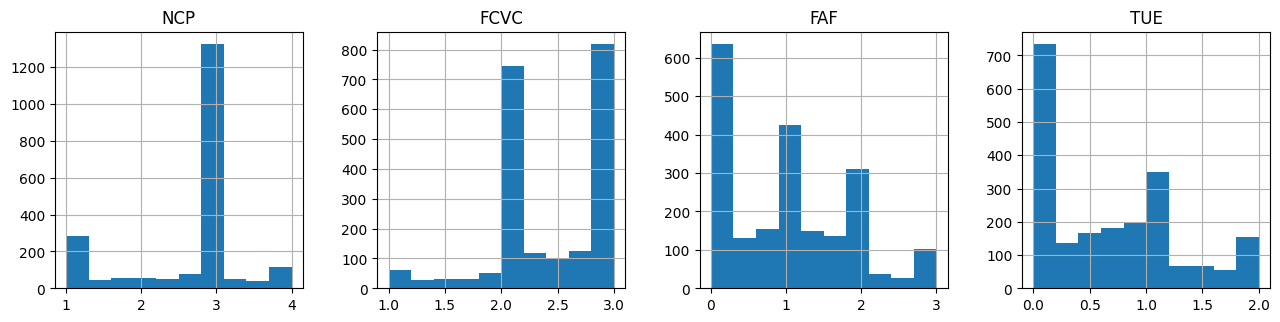

In [ ]:
colarrend = ['NCP', 'FCVC', 'FAF', 'TUE']
df_arrend = Independente_X[colarrend]
df_arrend.hist(layout = (3,6), sharex = False, figsize = (24,12))
plt.show()

<p align = "justify">Observando os histogramas nota-se que os valores numéricos são contínuos.  Ocorre que no artigo é descrito que as perguntas para estas variáveis exigia uma resposta discreta.  No caso do 'FCVC', por exemplo, a pergunta é "qual a frequência se come vegetais" e as opções de respostas são: 'nunca', 'às vezes' e 'sempre'. Ou seja, a resposta é discreta, e não contínua. Isto vale para todas variáveis apresentadas aqui. No 'TUE' a pergunta é "quanto tempo utilizando celular, videogame e outros" e as opções de respostas são três: entre zero a duas horas; entre três a cinco horas e mais de 5 horas. A frequência de atividade física por semana, 'FAF', têm quatros opções de respostas: não realiza; de uma a dois dias, de dois a quatro dias; de 4 a 5 dias. O número de refeições diárias, 'NCP', têm três opções de respostas: entre uma a duas refeições; três refeiçoes e mais de três refeições por dia.  Assim sendo, serão convertido os valores do tipo float para integer através do round(), assumindo que o valor é diretamente relacionada à frequência de hábitos que estas perguntas denotam, ou seja, quanto menor a frequência menor o valor numérico, e vice versa.  No caso do número de refeições diárias, será necessário ainda substituir valores, pois o arrendodamente criará 4 classes (1,2,3,4) e o que será feito é substituir o valor 2 por 1, o 3 por 2 e o 4 por 3.

In [ ]:
Independente_X['NCP'] = Independente_X['NCP'].round(0).astype(int)
Independente_X['FCVC'] = Independente_X['FCVC'].round(0).astype(int)
Independente_X['FAF'] = Independente_X['FAF'].round(0).astype(int)
Independente_X['TUE'] = Independente_X['TUE'].round(0).astype(int)

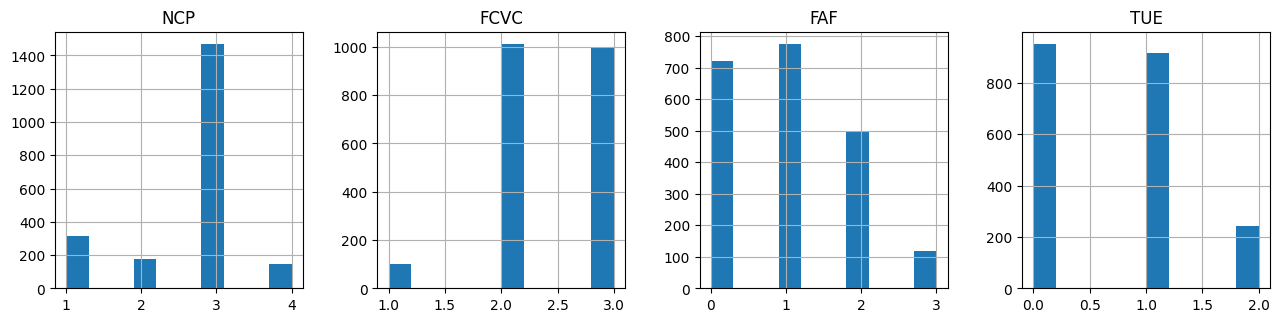

In [ ]:
colarrend = ['NCP', 'FCVC', 'FAF', 'TUE']
df_arrend = Independente_X[colarrend]
df_arrend.hist(layout = (3,6), sharex = False, figsize = (24,12))
plt.show()

In [ ]:
Independente_X['NCP'] = Independente_X['NCP'].replace({1: 1, 2: 1, 3: 2, 4: 3})
Independente_X['TUE'] = Independente_X['TUE'].replace({0.0: 1.0, 1.0: 2.0, 2.0: 3.0})

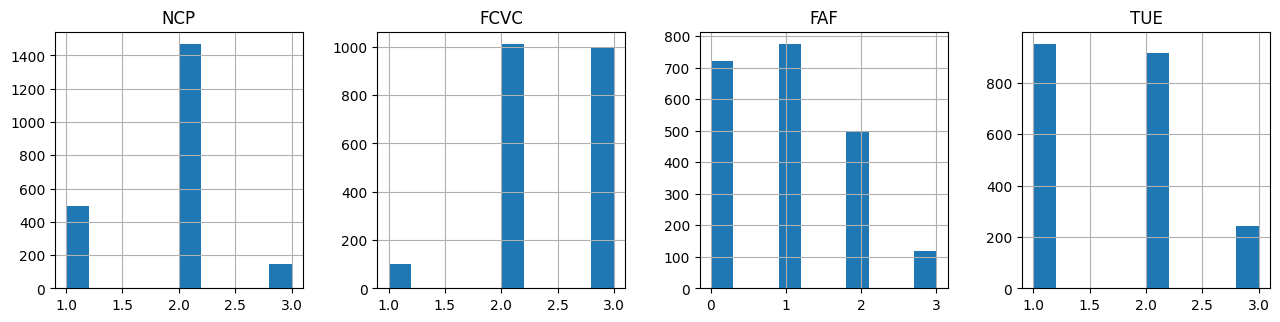

In [ ]:
colarrend = ['NCP', 'FCVC', 'FAF', 'TUE']
df_arrend = Independente_X[colarrend]
df_arrend.hist(layout = (3,6), sharex = False, figsize = (24,12))
plt.show()

Agora os valores contínuos foram convertidos em discretos o que facilita no agrupamento dos atributos em relação a coluna alvo (Y), veremos um exemplo com 'FAF' logo abaixo.

Observação: também foi substituido os valores do TUE, substituindo o 0 pelo 1, o 1 pelo 2 e o 2 pelo 3.

In [ ]:
dataset.groupby(['nivel_peso'])['FAF'].value_counts(normalize=True)

nivel_peso  FAF
1           2      0.430147
            1      0.264706
            0      0.264706
            3      0.040441
2           1      0.337979
            0      0.278746
            2      0.240418
            3      0.142857
3           1      0.434483
            0      0.289655
            2      0.193103
            3      0.082759
4           1      0.431034
            0      0.334483
            2      0.172414
            3      0.062069
5           0      0.373219
            1      0.350427
            2      0.205128
            3      0.071225
6           1      0.555556
            0      0.232323
            2      0.212121
7           0      0.577160
            2      0.212963
            1      0.209877
Name: proportion, dtype: float64

#**Análise Exploratória**

<p align="justify">Agora que a conversão da tipagem de dados e outras correções terminaram, é possível observar o dataset como um todo através de gráficos e dados estatísticos sumarizados.  Vamos observar como está a frequência dos grupos dentro de cada variável, se distribuição de seus grupos ocorrem de forma equilibrada ou concentrada e desigual. Iniciaremos verificando se a coluna alvo está realmente normalizada.  

Text(0.5, 1.0, 'Distribuição das classes do dataset')

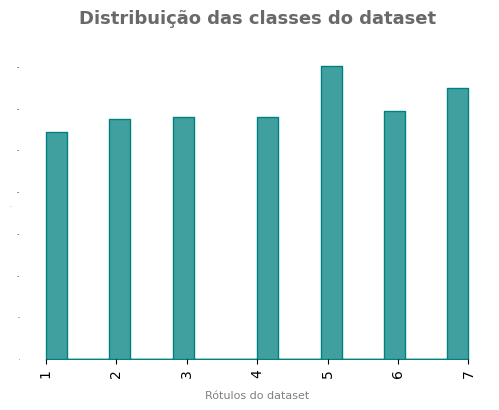

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(data = Categoria_y, x = 'NObeyesdad', bins=20,
             color = 'teal',
             element = 'step')

sns.despine(bottom=True, left=True)

plt.tick_params(axis = 'y', labelsize=0, length = 0)
plt.xticks(rotation=90)
plt.ylabel([], fontsize=0)

plt.xlabel('Rótulos do dataset', color = 'grey', fontsize = 8,
           labelpad = 9)
plt.title('Distribuição das classes do dataset', pad = 20, fontsize = 13,
          color = 'dimgrey', fontweight = 'bold')

O gráfico ilustra que os grupos da variável y está, de fato, normalizada.  A seguir, vamos ver o resumo estatístico do dataset: média, desvio padrão, mínimo, máximo e os quartis.

In [ ]:
dataset.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,nivel_peso
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.423496,1.837518,1.140692,0.020843,2.008011,0.045476,1.006632,1.664614,0.731407,0.029844,4.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.583905,0.526667,0.468543,0.142893,0.612953,0.208395,0.895462,0.674009,0.515498,0.170196,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.584812,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,4.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000,2.477420,0.000000,2.000000,2.000000,1.000000,0.000000,6.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,7.000000


Agora veremos a Matriz de Correlação com Seaborn para a avaliação de covariância entre duas variáveis.

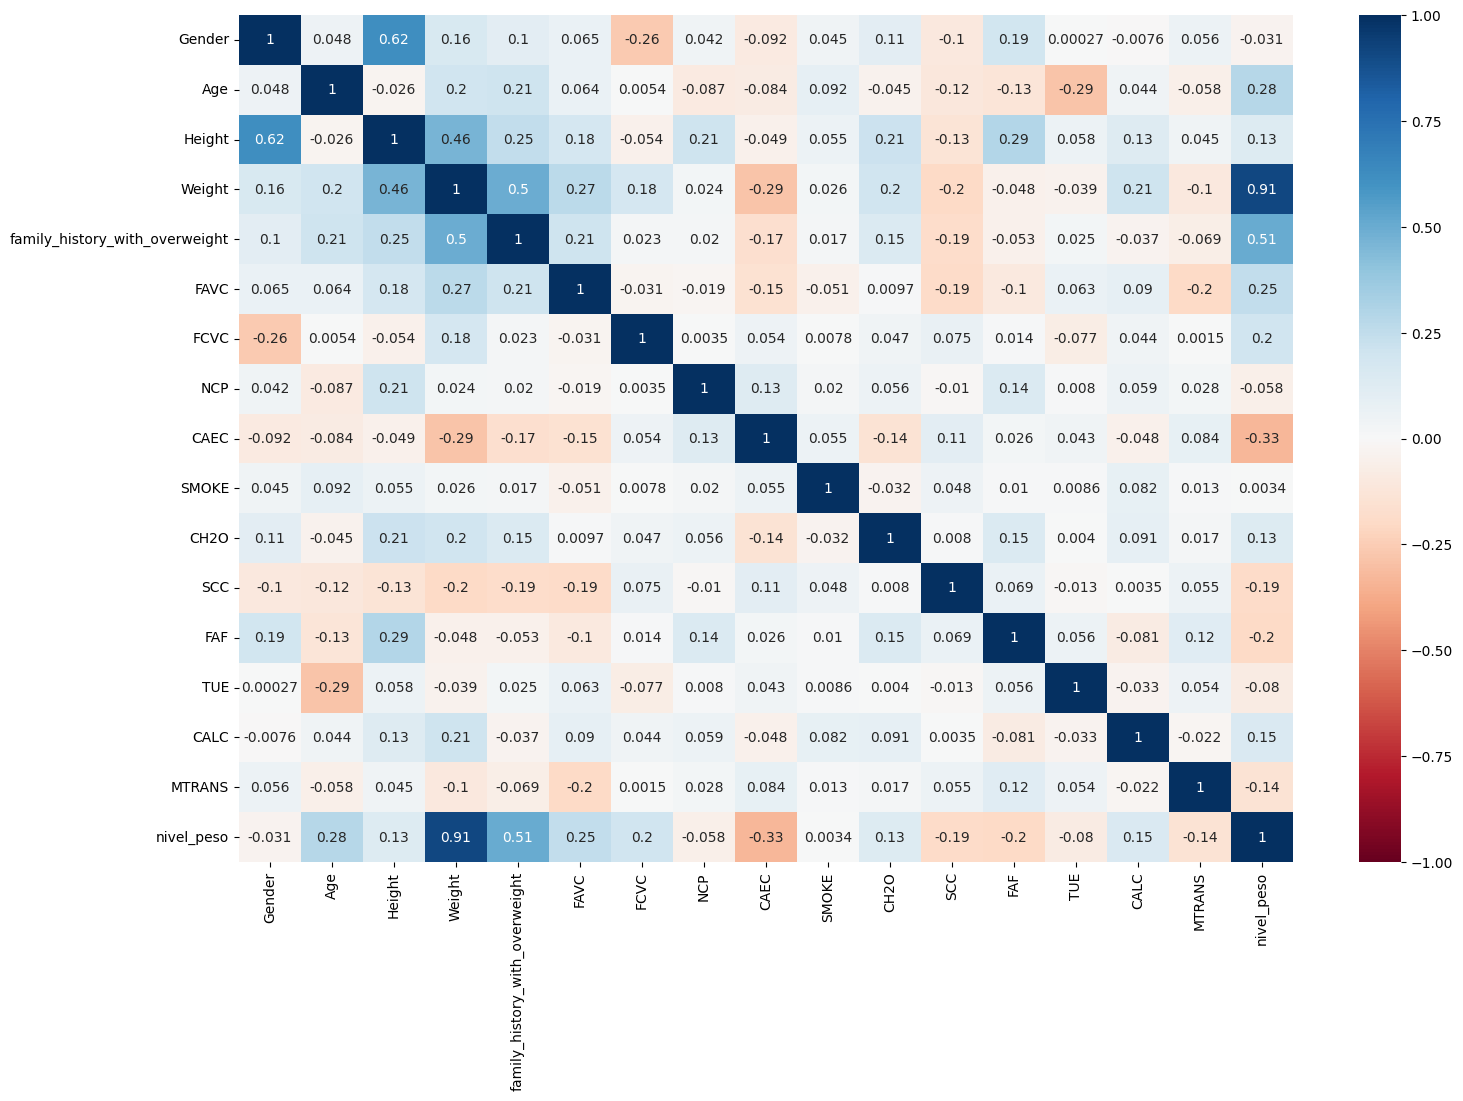

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (17,11))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

<p align="justify">A matriz acima ilustra a correlação entre as duas variáveis (os valores quanto mais próximo de zero maior é a dependência entre as duas variáveis avaliadas).  É possível perceber que a covariância entre todas as variaveis é predominantemente baixa.  Avaliando especificamente a covariância entre os atributos de X com a variável Y, os três primeiros que apresentam maior covariância:   o Peso, que está fortemente correlacionado (algo já esperado); o Histórico Familiar com Sobrepeso, apresentando uma média correlação e o Consumo de comida entre as refeições (CAEC).  Do lado oposto, as três variáveis com as menores covariâncias são relacionadas ao Uso de Cigarro (SMOKE); ao Número de refeições diárias (NCP) e ao Gênero (Gender).  Interessante notar que apesar baixa correlação entre a variável TUE com o alvo, existe uma boa correlação entre esta e a Idade.

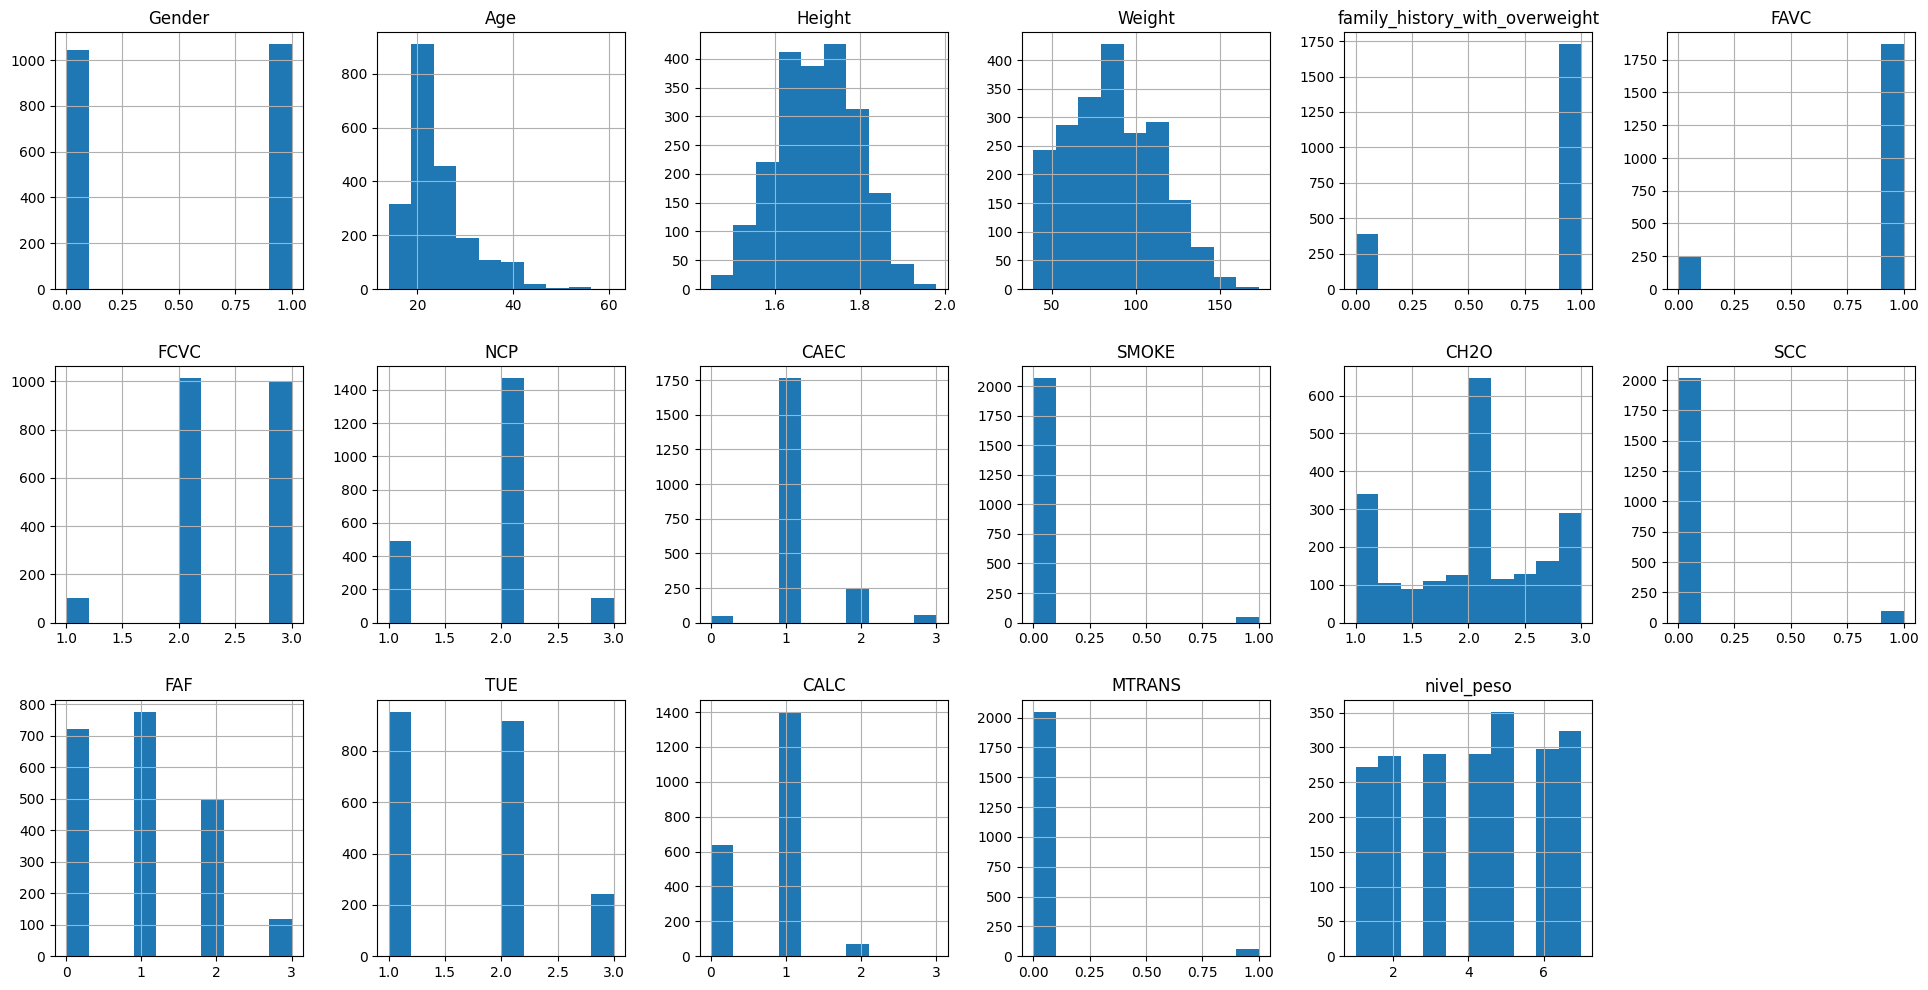

In [ ]:
dataset.hist(layout = (3,6), sharex = False, figsize = (24,12))
plt.show()

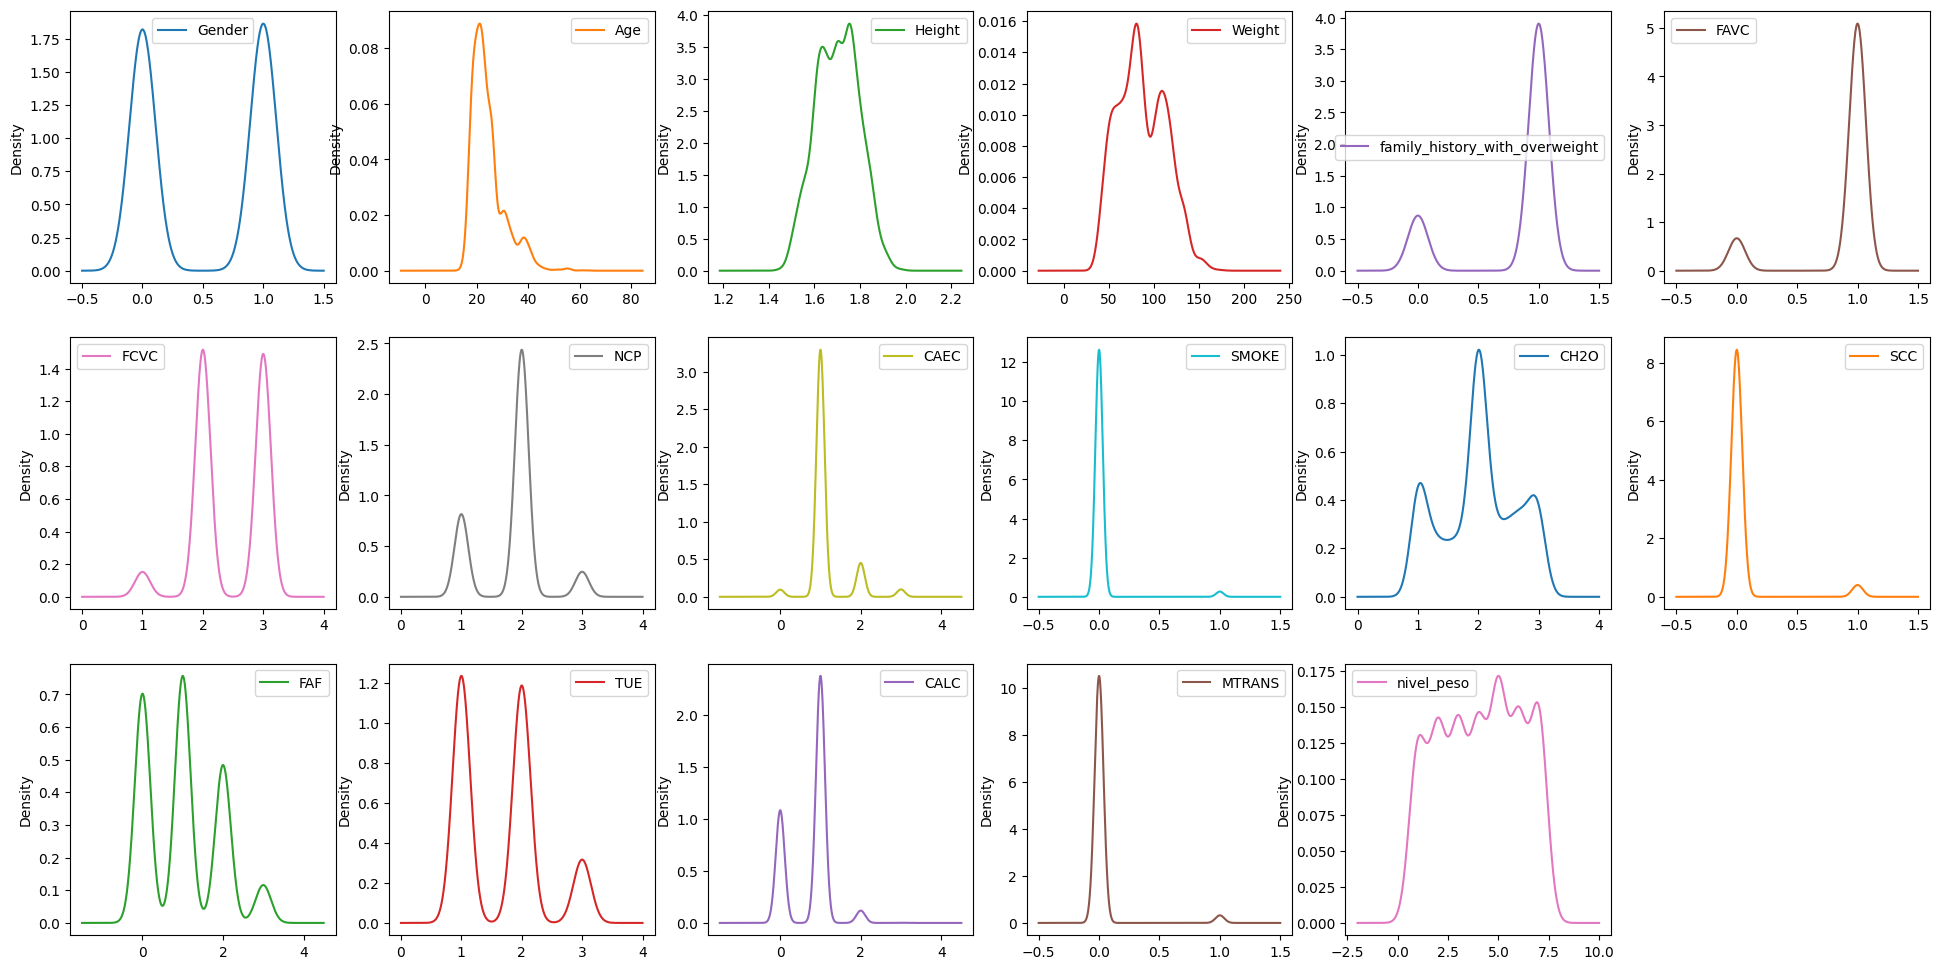

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,6), sharex = False, figsize = (24,12))
plt.show()

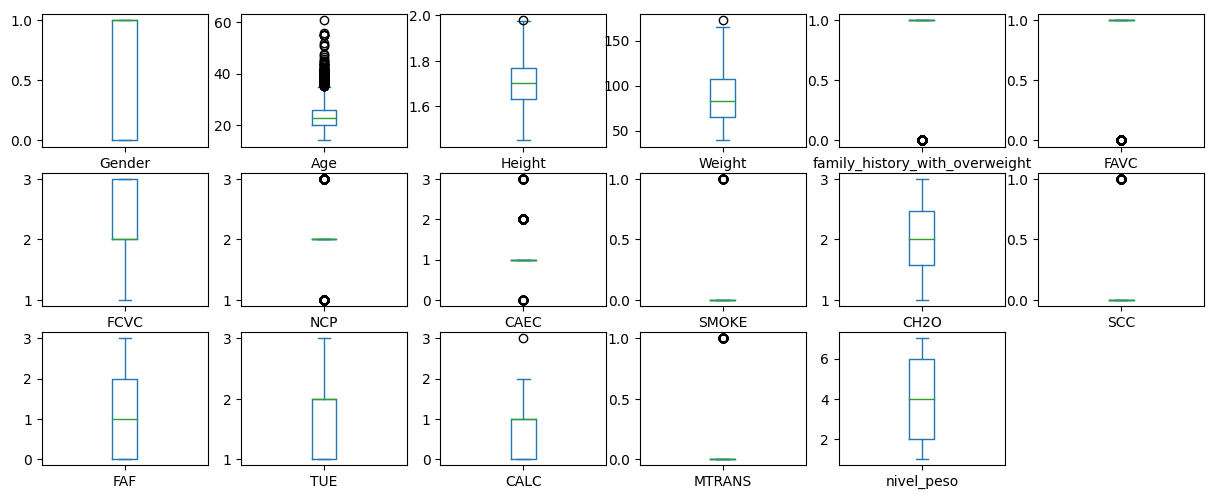

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (5,6), sharex = False, sharey = False, figsize = (15,10))
plt.show()

<p align="justify">Analindo o histograma, gráfico de densidade e o boxplot, é possível verificar que apenas o atributo relacionado a variável gênero tem a divisão entre os grupos praticamente igual. Outras  variáveis, como a idade, está muito concentrada sobre um determinado grupo ou valor específico.  Neste exemplo vemos que há muitos registros em torno da idade 20 anos. Também é importante observar esta concentração na tabela que sumariza as informações estatísticas, pois até 75% do total de registros do dataset há concentração de idade igual ou menor do que 26 anos e, por outro lado, a idade máxima no dataset vai até 61 anos.

# **Separação da base entre treino e teste**

<p align = "align">Agora será feito a separação da entre conjunto de treino e o conjunto de teste.  O primeiro serve para o treinamento do modelo enquanto que o segundo serve como base para teste do modelo.  A separação será 25% para teste e 75% para treino.  Também serão criados os parâmetros e partições para validação cruzada.  Para avaliar o desempenho do modelos em relaçao aos atributos relacionados a habitos alimentares e físicos, serão desconsideradas duas variaveis: idade e altura. A primeira, como visto antes, está com uma concentração elevada dentro de uma faixa etária em torno de 20 anos, oferecendo um risco alto de aprendizado enviesado da máquina. A altura será retirada por ser uma variável que em conjunto com o peso tem estreita ligação com a classe. O peso, por outro lado, será mantido por ser uma variável mais importante do conjunto do dataset.  Também se pretende excluir mais três características que serão analisadas logo após o split com o auxilio disponível de feature selection do sklearn.   

In [ ]:
dataset = dataset.drop('Age', axis = 1)
dataset = dataset.drop('Height', axis = 1)

In [ ]:
test_size = 0.25
seed = 42

array = dataset.values
X = array[:,0:14]
y = array[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# **Avaliação dos atributos através do Feature Selection**

Será instanciado o modelo ExtraTreesClassifier para ter a order de
importância dos tributos onde quanto maior o valor, maior a relevância da variável. O cálculo feito pelo método fit sobre o conjunto de treinamento.

In [ ]:
Selecao_ET = ExtraTreesClassifier(n_estimators=100)
Selecao_ET.fit(X_train,y_train)

print("\nAtributos Originais:", dataset.columns[0:14])
print(Selecao_ET.feature_importances_)


Atributos Originais: Index(['Gender', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')
[0.091 0.337 0.051 0.028 0.072 0.061 0.049 0.006 0.1   0.014 0.059 0.05
 0.072 0.011]


<p align = "justify">Agora será feito algo semelhante com o SelectKBest.  A diferença é que determinado o número de features que serão preservados através do parâmetro k. O cálculo feito pelo fit é instanciado e servirá como meio para fazer as transformação sobre as bases de treino e de teste.

In [ ]:
best_var = SelectKBest(score_func=f_classif, k=11)
kbest = best_var.fit(X_train, y_train)
features = kbest.transform(X_train)

print('\nNúmero original de atributos:', X_train.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:14])

# Exibe as pontuações de cada atributos e os 11 selecionados
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", kbest.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:14]))


Número original de atributos: 14

Número reduzido de atributos: 11

Atributos Originais: Index(['Gender', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

Scores dos Atributos Originais: [ 122.941 1463.802  103.132   32.658   70.19    25.131   60.763    3.011
   10.356   14.185   15.257    5.588   25.473   14.895]

Atributos Selecionados: ['Gender' 'Weight' 'family_history_with_overweight' 'FAVC' 'FCVC' 'NCP'
 'CAEC' 'SCC' 'FAF' 'CALC' 'MTRANS']


Ambos os métodos elencaram por order de menor importância, as variáveis SMOKE e TUE. A variável CH2O teve avaliação pior pelo KBest em relação o modelo ExtraTree.  Será feito a transformação utilizando o resultado do KBest sobre o conjunto de treino e teste de X.

In [ ]:
X_train = kbest.transform(X_train)

In [ ]:
X_test = kbest.transform(X_test)

# **Modelagem e Inferência**

Finalmente chegamos a etapa a avaliação dos modelos, iniciaremos seguindo estas etapas:

1.   Criação de uma lista vazia que armazenará os modelos e essembles a serem adicionados;
2.   Criação de parâmetros simples para o Essembles;
1.   Criação de listas vazias para armazenar resultados e nomes;
2.   Iteração de modelos com base de treino através do Cross Validation;
1.   Impressão do resultado







LR: 0.700303 (0.031717)
KNN: 0.829114 (0.035351)
CART: 0.836000 (0.036608)
NB: 0.604430 (0.027816)
SVM: 0.537975 (0.037159)
Bagging: 0.861197 (0.031915)
RF: 0.867925 (0.027047)
ET: 0.851743 (0.031158)
Ada: 0.362790 (0.025614)
GB: 0.848579 (0.023591)
Voting: 0.778481 (0.033592)


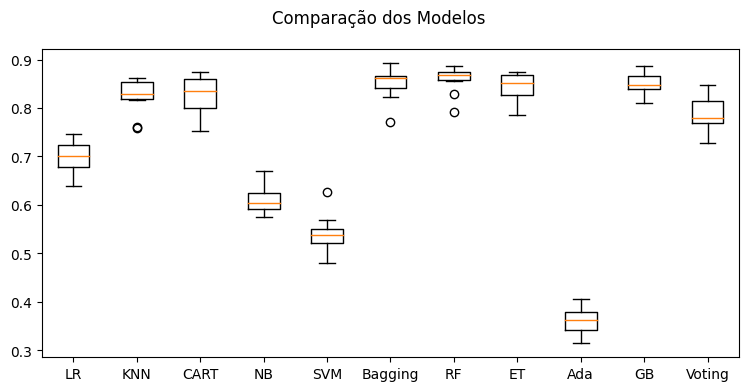

In [ ]:
np.random.seed(42) # definindo uma semente global

models = []

models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(9,4))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Pelo resultado inicial, vê-se que os melhores resultados foram o ExtraTree, Bagging e Random Forest tiveram os melhores reultados.  Vamos ver esta mesma comparação com dados normalizados e padronizados através da criação de pipelines.

LR-orig: 0.700 (0.032)
KNN-orig: 0.829 (0.035)
CART-orig: 0.836 (0.037)
NB-orig: 0.604 (0.028)
SVM-orig: 0.538 (0.037)
Bag-orig: 0.861 (0.032)
RF-orig: 0.868 (0.027)
ET-orig: 0.852 (0.031)
Ada-orig: 0.363 (0.026)
GB-orig: 0.849 (0.024)
Vot-orig: 0.778 (0.034)
LR-padr: 0.766 (0.036)
KNN-padr: 0.742 (0.039)
CART-padr: 0.833 (0.032)
NB-padr: 0.604 (0.029)
SVM-padr: 0.764 (0.033)
Bag-padr: 0.861 (0.030)
RF-padr: 0.867 (0.028)
ET-padr: 0.852 (0.024)
Ada-padr: 0.363 (0.026)
GB-padr: 0.852 (0.023)
Vot-padr: 0.826 (0.039)
LR-norm: 0.678 (0.032)
KNN-norm: 0.732 (0.033)
CART-norm: 0.820 (0.033)
NB-norm: 0.604 (0.029)
SVM-norm: 0.741 (0.036)
Bag-norm: 0.861 (0.033)
RF-norm: 0.864 (0.027)
ET-norm: 0.845 (0.027)
Ada-norm: 0.363 (0.026)
GB-norm: 0.849 (0.024)
Vot-norm: 0.760 (0.042)


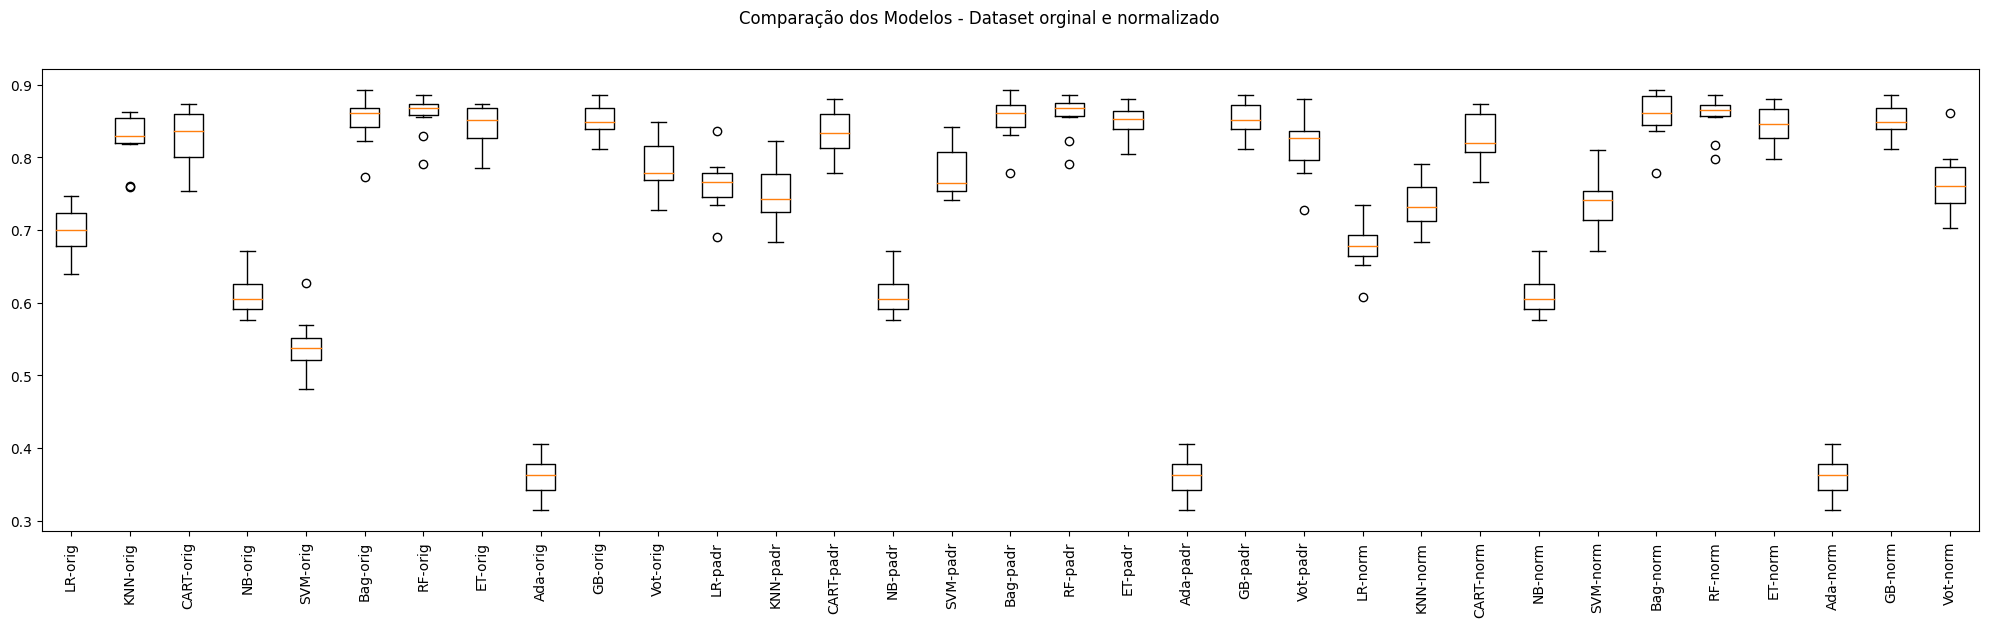

In [ ]:
np.random.seed(42)

pipelines = []
results = []
names = []

reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#Dataset Original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

#Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, np.median(cv_results), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

<p align = "justify">O melhor resultado sobre a base treino foi para o algoritmo Random Forest com mediana de 0,868 e desvio padrão de 0,027 no conjunto original.  A seguir será feita uma pesquisa para encontrar hiperparâmetros melhores para o Random Forest com o auxílio do GRIDSEARCH.

<p align = "justify">Os paramêtros que serão utilizados para avaliação são:  número de estimadores (n_estimator), a profundidade máxima da arvore (max_depth), o número mínimo de amostras para realizar a divisão de um nó interno (min_samples_split), o número mínimo de amostras necessárias em um nó folha (min_samples_leaf) e se a bootstrap estará ativo ou não.

# **Pesquisa de Hiperparâmetros**

In [ ]:
np.random.seed(42)

pipelines = []

random_forest = ('RF', RandomForestClassifier())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())
standard_scaler = ('StandardScaler', StandardScaler())

pipelines.append(('RF-orig', Pipeline(steps=[random_forest])))
pipelines.append(('RF-norm', Pipeline(steps=[min_max_scaler, random_forest])))
pipelines.append(('RF-padr', Pipeline(steps=[standard_scaler, random_forest])))

param_grid = {
    'RF__n_estimators': [50, 100, 200, 300],
    'RF__max_depth': [None, 10, 20, 30],
    'RF__min_samples_split': [10, 15, 30],
    'RF__min_samples_leaf': [5,7,10],
    'RF__bootstrap': [True, False]
}

for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

RF-orig - Melhor: 0.858495 usando {'RF__bootstrap': False, 'RF__max_depth': 20, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 15, 'RF__n_estimators': 100}
RF-norm - Melhor: 0.859139 usando {'RF__bootstrap': False, 'RF__max_depth': 20, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}
RF-padr - Melhor: 0.859772 usando {'RF__bootstrap': False, 'RF__max_depth': None, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}


O melhor resultado desta consulta (0.859772) sobre a base padronizada, portanto não superou os parâmetros preestabelecido.  Também não será feita transformação escalar (normalização ou padronizaçao da base original).

# **Aplicação do modelo e avaliação do resultado: acurácia e matrix de confusão**

In [ ]:
modelorf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [ ]:
modelorf.fit(X_train, y_train)
predict_yteste = modelorf.predict(X_test)
print(accuracy_score(y_test, predict_yteste))

0.8712121212121212


In [ ]:
print("Matrix de confusão")
print(confusion_matrix(y_test, predict_yteste))

Matrix de confusão
[[59  9  0  0  0  0  0]
 [ 4 59  9  0  0  0  0]
 [ 0 12 53  7  1  0  0]
 [ 0  1 10 60  1  0  0]
 [ 0  0  0  7 77  4  0]
 [ 0  0  0  0  1 72  1]
 [ 0  0  0  0  0  1 80]]


In [ ]:
print("Relatório da predição")
print(classification_report(y_test, predict_yteste))

Relatório da predição
              precision    recall  f1-score   support

         1.0       0.94      0.87      0.90        68
         2.0       0.73      0.82      0.77        72
         3.0       0.74      0.73      0.73        73
         4.0       0.81      0.83      0.82        72
         5.0       0.96      0.88      0.92        88
         6.0       0.94      0.97      0.95        74
         7.0       0.99      0.99      0.99        81

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.88      0.87      0.87       528



Pelo f1-score é possível perceber que as classes de peso normal e de sobrepeso nível I tiveram o maior número de erros de predição, enquanto que a obesidade nível III teve o maior número de acertos.

Agora falta verificar no conjunto inteiro.  Primeiro é necessário excluir os atributos que foram excluidos no conjunto X de treino e de teste através do kbest.

In [ ]:
X = kbest.transform(X)

In [ ]:
modelorf.fit(X, y)
predict_ytodo = modelorf.predict(X)
print(accuracy_score(y, predict_ytodo))

0.9976314542870678


In [ ]:
print("Matrix de Confusão no Dataset Inteiro")
print(confusion_matrix(y, predict_ytodo))

Matrix de Confusão no Dataset Inteiro
[[272   0   0   0   0   0   0]
 [  3 284   0   0   0   0   0]
 [  0   0 289   1   0   0   0]
 [  0   0   0 290   0   0   0]
 [  0   0   0   1 350   0   0]
 [  0   0   0   0   0 297   0]
 [  0   0   0   0   0   0 324]]


<p align = "justify">Com o dataset inteiro o modelo conseguiu acerta 99% da coluna alvo, tendo um desempenho pior na classe 2 (peso normal).  

<p align = "justify">Só falta avaliar agora se modelo não   "memorizou" os valores do dataset, ao invés de efetivamente aprendido realizar a predição da coluna.  Por isso criaremos um dataframe com novos valores para averiguar.

#**Testagem do modelo com novos valores**

<p align = "justify">Será criado um dataframe com quatro perfis distintos:

<p align = "justify">O primeiro é de uma mulher com 70 quilos como problema de
histórico famíliar; que costuma comer alimentos altamente calóricos; que come verduras ás vezes, que tem três refeições diárias, que "belisca" às vezes entre as refeições, que não monitora o consumo de caloria, que pratica exercício físico duas vezes por semana, que não consome alcool e que usa de algo veículo de transporte, público ou particular.  A expectativa que a classe predita seja 2, peso normal, ou 3, sobrepeso nível I.

<p align = "justify">O segundo perfil será de um homem com 70 quilos, sem histórico familiar de sobrepeso, que não costuma comer alimentos calóricos, que sempre come verduras, que realiza três refeições por dia, que às vezes consome algo entre as refeições, que monitora o consumo de calorias, que pratica exercício físico duas vezes por semana, que não consome alcool e que costumar se deslocar a pé para o trabalho.  A expectativa da predição é que seja 2, peso normal.

<p align = "justify">O terceiro perfil também homem com 70 quilos, com problema com histórico familiar, que come com frequência alimentos altamente calóricos; que não come verdura nas refeições, que tem mais três de refeições diárias, que sempre belisca entre as refeições, que não monitora as calorias consumidas, que não pratica atividade física, que sempre consome bebida alcoolica e que usa algum veículo de transporte, público ou particular.  A expectativa seja que a classe predita seja de 4 adiante (indicando sobrepeso nível 2 ou obesidade nível I).

<p align = "justify">O quarto e último perfil será mulher, com 70 quilos, sem histórico familiar de sobrepeso, que não costuma comer alimentos altamente caloricos, que não consome vegetais nas refeições, que tem menos de três refeições diárias por dia, que não come entre as refeições, que não monitora o consumo diario de refeições, que não pratica atividade física, que consome bebida alcoolica com frequência e que se desloca ao trabalho a pé.  A expectativa é peso abaixo do normal.


In [ ]:
data = {
       'genero': [0, 1, 1, 0],
       'peso': [70, 70, 70, 70],
       'historico': [1, 0, 1, 0],
       'favc': [1, 0, 1, 0],
       'fcvc': [2, 3, 1, 1],
       'ncp': [2, 2, 3, 1],
       'caec': [1, 1, 3, 0],
       'scc': [0, 1, 0, 0],
       'faf': [1, 1, 0, 0],
       'calc': [0, 0, 3, 2],
       'mtrans': [0, 1, 0, 0]
       }

atributos = ['genero', 'peso', 'historico', 'favc', 'fcvc', 'ncp', 'caec', 'scc', 'faf', 'calc', 'mtrans']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:11].astype(float)

In [ ]:
saidas = modelorf.predict(entrada)
print(saidas)

[3. 2. 2. 3.]


<p align = "align">O resultado não saiu como esperado no terceiro e quarto perfil.  Vamos somente alterar o peso destes perfis para avaliar o resultado.

In [ ]:
data2 = {
        'genero': [0, 1, 1, 0],
        'peso': [70, 70, 90, 50],
        'historico': [1, 0, 1, 0],
        'favc': [1, 0, 1, 0],
        'fcvc': [2, 3, 1, 1],
        'ncp': [2, 2, 3, 1],
        'caec': [1, 1, 3, 0],
        'scc': [0, 1, 0, 0],
        'faf': [1, 1, 0, 0],
        'calc': [0, 0, 3, 2],
        'mtrans': [0, 1, 0, 0]
        }

atributos2 = ['genero', 'peso', 'historico', 'favc', 'fcvc', 'ncp', 'caec', 'scc', 'faf', 'calc', 'mtrans']
entrada2 = pd.DataFrame(data2, columns=atributos2)

array_entrada2 = entrada2.values
X_entrada2 = array_entrada2[:,0:11].astype(float)

In [ ]:
saidas = modelorf.predict(X_entrada2)
print(saidas)

[3. 2. 4. 1.]


<p align = "justify">Agora o resultado saiu conforme o esperado, indicando que o peso é a variavel mais forte para predição e que outros atributos relacionados à hábitos alimentares e atividade física precisam que os valores da variável peso esteja bem ajustado para funcionarem bem.

# Considerações Finais

<p align = "justify">Para realização deste projeto, se fez necessário conversão de tipo de dados e arrendodamento de valores. Em seguida foi feito análise exploratória onde se percebeu que a distribuição valores na maioria das variáveis eram concentradas, como mo caso da idade. Para avaliar a capacidade das variáveis relacionadas a habitos alimentares e esforço físico de serem bons preditores, foram excluídas as variáveis altura e idade. Não foram excluidos gênero e nem peso corporal, pois o primeiro tem uma distribuição igualitária no dataset e o segundo tem uma correlação muito alta com alvo para ser excluída. Outras variáveis retiradas antes do treino de máquina foram as variáveis relacionadas ao consumo de água, consumo de cigarro e quantidade de horas em celular e/ou dispositivos eletrônicos.

<p align = "justify">Como resultado do modelo, o Random Forest, percebeu-se que durante a cross validation, a normalização e padronização dos dados não influenciaram muito na estimativa da acurácia, possivelmente por que a maioria dos valores das diferentes colunas eram muito semelhantes - exceto o peso.  

<p align = "justify">A acurácia do modelo foi alta no conjunto de treinamento e muito alta no conjunto inteiro.  Foi observado na matrix de confusão e no relatório de desempenho da classificação que as classes com maior número de acerto se encontra naqueles casos de obesidade e o com maior número de erros nas classes de peso normal e de sobrepeso nível I.  Possivelmente a causa
desta diferença seja o enfoque na identificação de casos de obesidade por parte responsável pela confecção do dataset.

<p align = "justify">Para finalizar, foi testado o modelo com valores novos e o resultado demonstrou que o peso é a variável mais forte para predição, sendo as outras com poder predição mais limitado.




<p align = "center">Este é o meu primeiro MVP e treinamento de máquina na vida. Espero evoluir cada vez para realizar outros projetos como segmentação de imagem para classificação de uso de solo e mais treinamento de máquina. Muito obrigada pela atençao!